In [1]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
import os 
from pathlib import Path
import re
import PIL
import cv2
import seaborn as sns 
import copy
import importlib

import spectral_util
importlib.reload(spectral_util)
from spectral_util import *

import fluorescence_util
importlib.reload(fluorescence_util)
from fluorescence_util import *


In [2]:
# 'board.xlsx'
# 'board_noFlux.xlsx'
# 'flux_20240925_184835.xlsx'
# 'flux-onBoard.xlsx'
# 'lead_noFlux.xlsx'

# srcbase = Path("./data/EEM_F-7000_2025-04-11/")
print(Path.cwd())
srcbase = Path("./data/EEM_F-7000_2025-05-29/")
dstdir = Path("./dst/eem/filter")

srcdata = [
    {
        "path": fpath,
        "sample": fpath.stem.split("_")[0],  # 'ABS_20250411' → 'ABS'
        "label": None
    }
    for fpath in srcbase.glob("*.xlsx")
]
srcdata

c:\Users\sawamoto24\sawamoto24\修士研究\microplastic


[{'path': WindowsPath('data/EEM_F-7000_2025-05-29/ABS.xlsx'),
  'sample': 'ABS',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/HDPE.xlsx'),
  'sample': 'HDPE',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/LDPE.xlsx'),
  'sample': 'LDPE',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PC.xlsx'),
  'sample': 'PC',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PET_20250529_150210.xlsx'),
  'sample': 'PET',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PMMA.xlsx'),
  'sample': 'PMMA',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PP.xlsx'),
  'sample': 'PP',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PS.xlsx'),
  'sample': 'PS',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PVC.xlsx'),
  'sample': 'PVC',
  'label': None}]

EEM of "ABS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "HDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "LDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PET"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PMMA"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PP"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PVC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].


<Figure size 640x480 with 0 Axes>

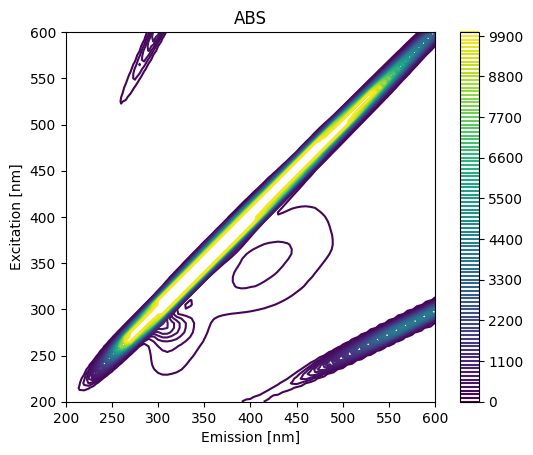

<Figure size 640x480 with 0 Axes>

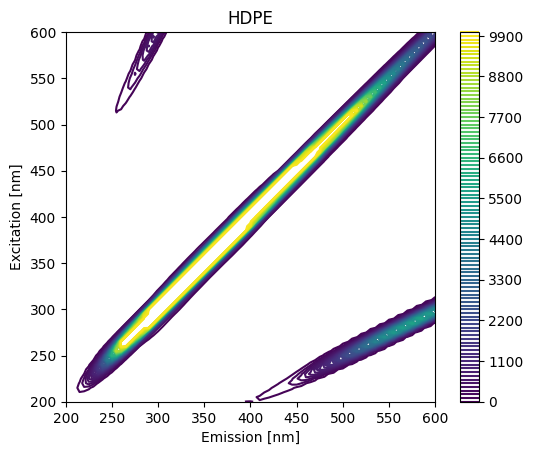

<Figure size 640x480 with 0 Axes>

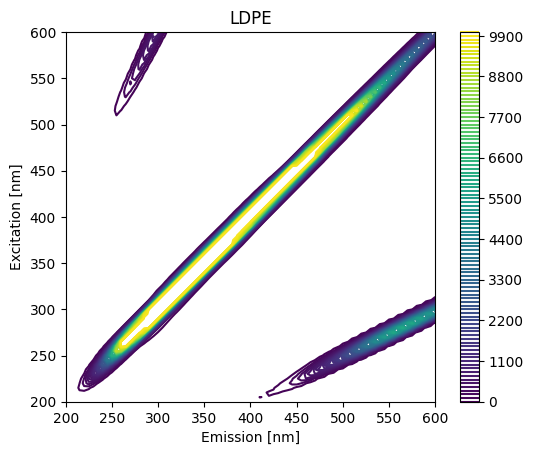

<Figure size 640x480 with 0 Axes>

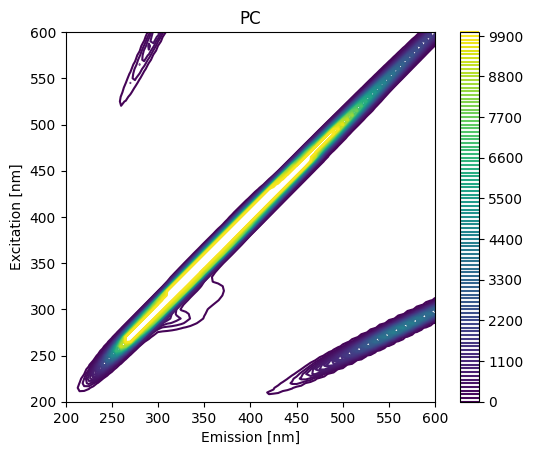

<Figure size 640x480 with 0 Axes>

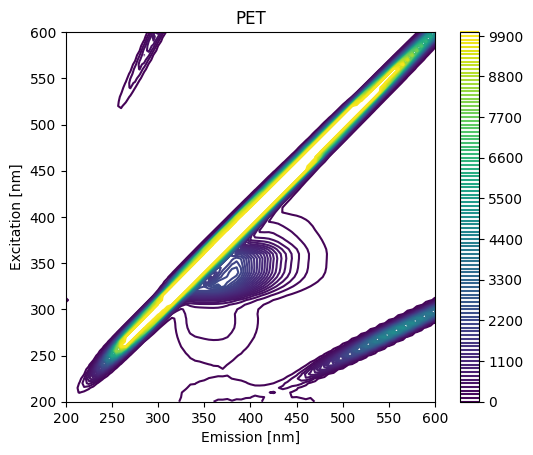

<Figure size 640x480 with 0 Axes>

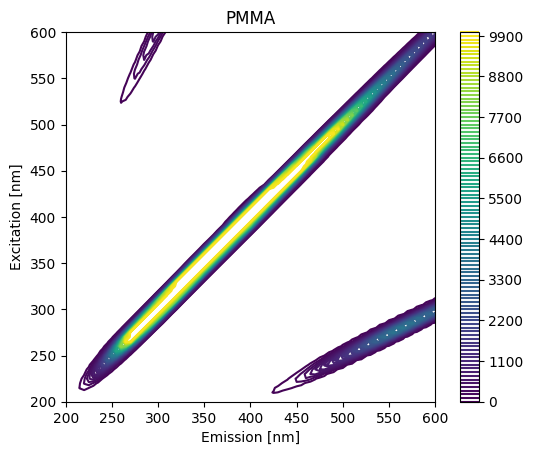

<Figure size 640x480 with 0 Axes>

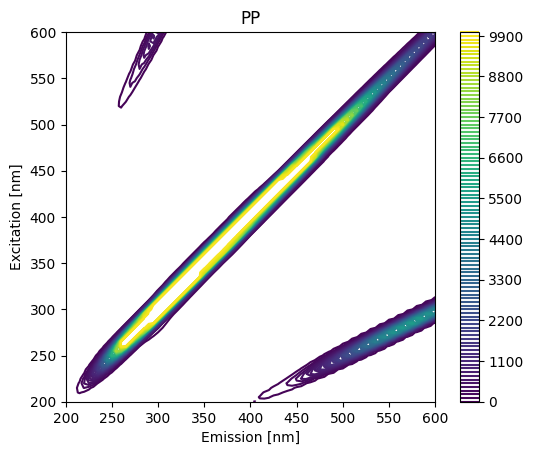

<Figure size 640x480 with 0 Axes>

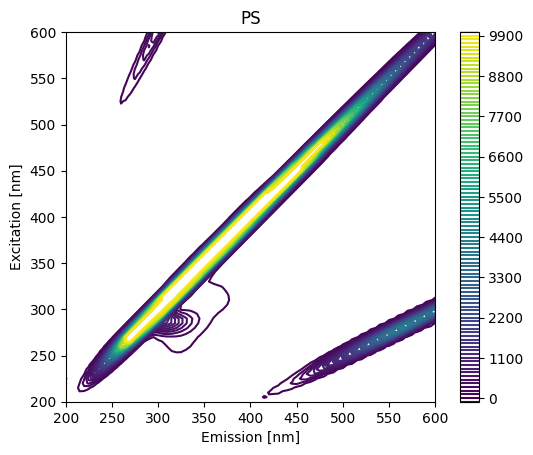

<Figure size 640x480 with 0 Axes>

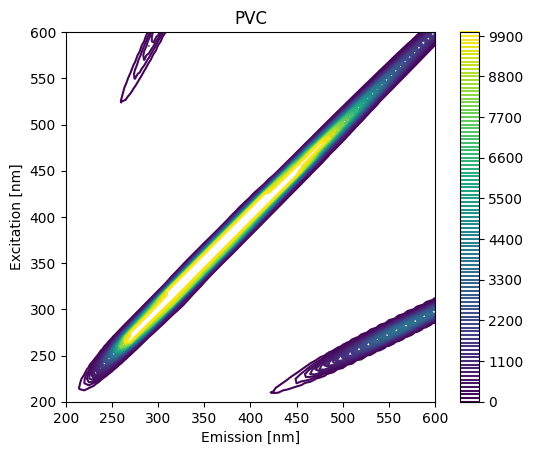

In [3]:
for data in srcdata:
    eem = fluorescence_util.EEMF7000(data.get('path'))
    print(eem)

    plt.figure()
    eem.plot_contour(level=100, show_sample_name=True)

In [4]:
em_bands = eem.em_bands
ex_bands = eem.ex_bands

EEM of "ABS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "HDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "LDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PET"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PMMA"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PP"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PVC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
(9, 71, 71)


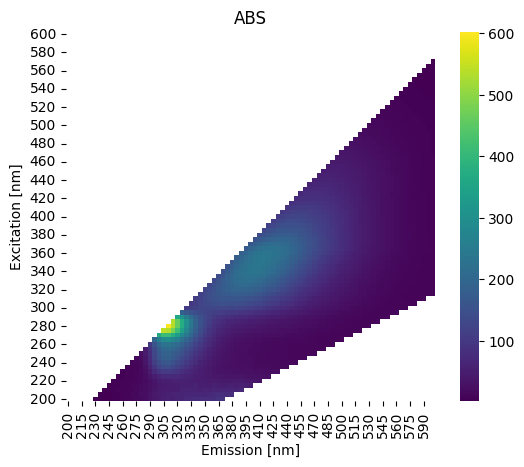

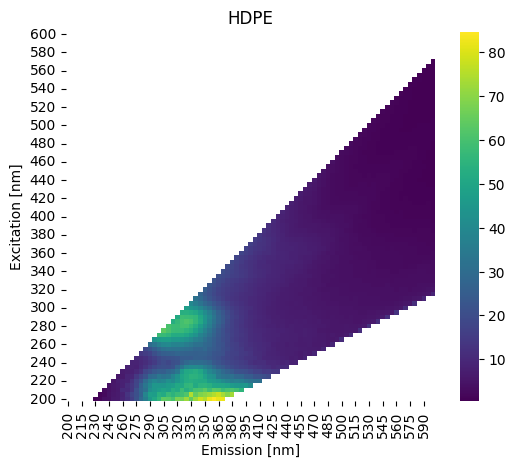

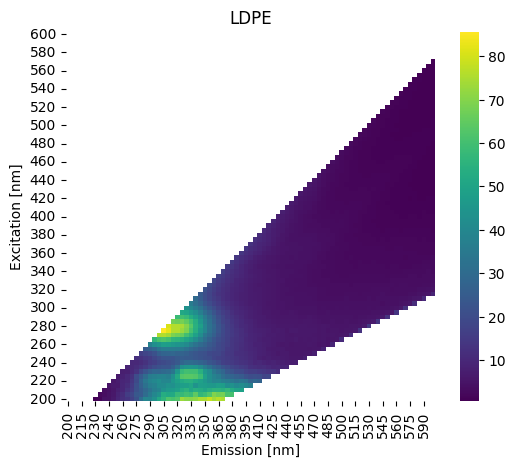

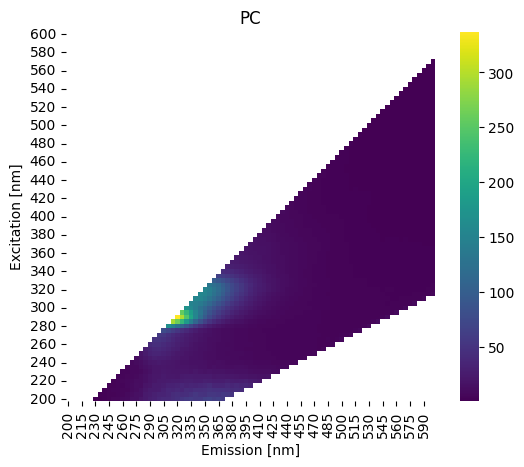

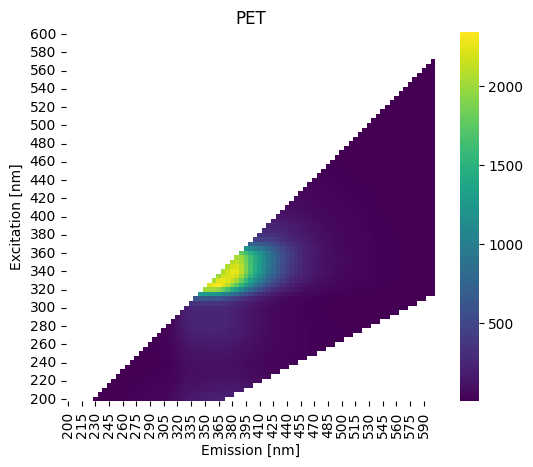

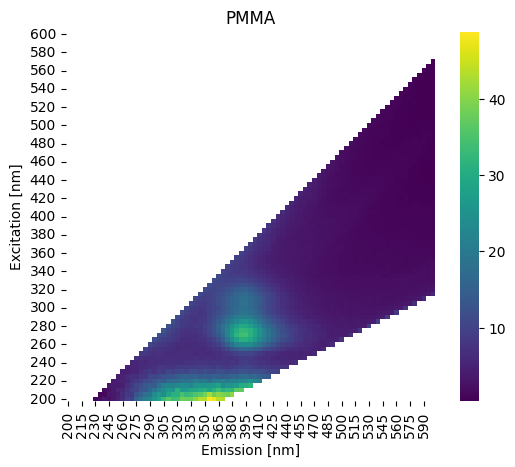

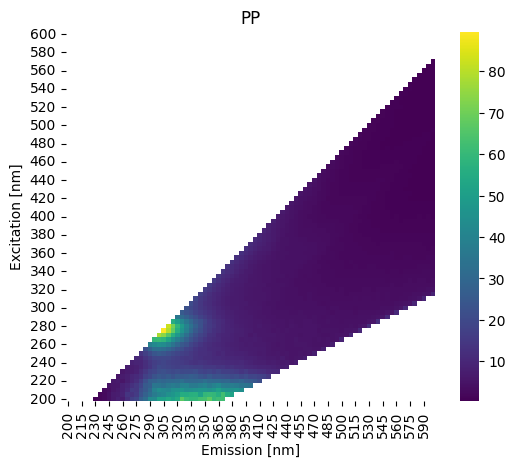

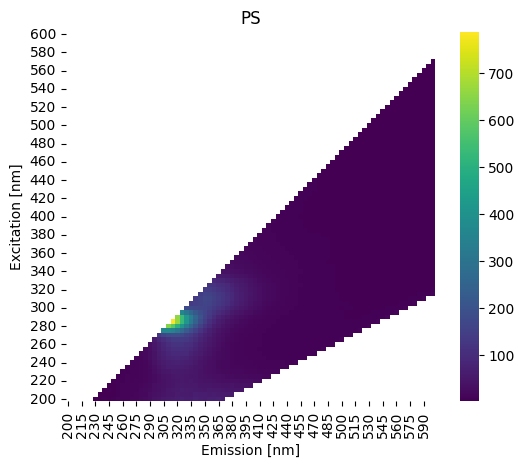

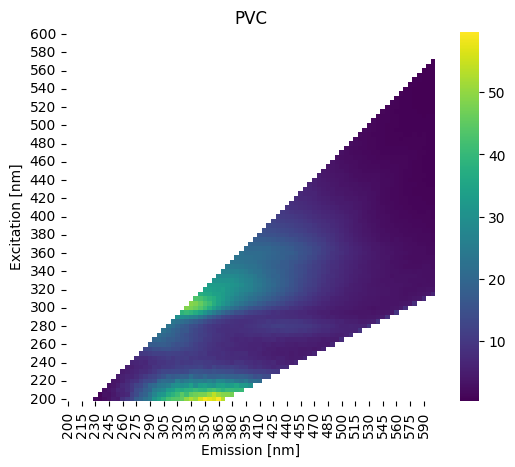

In [5]:
# for data in srcdata:
#     eem = fluorescence_util.EEMF7000(data.get('path'))
#     print(eem)

#     plt.figure()

#     # ① 散乱ピーク除去
#     eem.remove_self_reflection_and_scattering_from_eem(margin_steps=6,
#                                                        remove_first_order=True, 
#                                                        inplace=True)

#     # ② 追加で散乱領域全体を除去
#     eem.remove_scatter_regions(inplace=True)

#     eem.plot_heatmap()
#     plt.title(eem.sample)

sample_data = []
sample_name = []

for data in srcdata:

    eem = fluorescence_util.EEMF7000(data.get('path'))
    print(eem)

    plt.figure()

    # ①散乱ピーク除去
    eem.remove_self_reflection_and_scattering_from_eem(margin_steps=6,
                                                       remove_first_order=True,
                                                        inplace=True)

    # ② 追加で散乱領域全体を除去
    eem.remove_scatter_regions(inplace=True)

    
    # 250nm以上のインデックスを取得
    ex_mask = ex_bands >= 250
    em_mask = em_bands >= 250

    eem.plot_heatmap()
    plt.title(eem.sample)


    eem_matrix = eem.mat  # numpy配列を取り出す

    eem_matrix = np.nan_to_num(eem.mat, nan=0.0)
    eem_matrix_trimmed = eem_matrix[np.ix_(ex_mask, em_mask)]

    sample_data.append(eem_matrix_trimmed)
    sample_name.append(eem.sample)


# numpy配列に保存
eem_array = np.array(sample_data)
print(eem_array.shape)

## 波長域の調整

In [6]:
ex_mask = np.array(ex_bands) >= 250
em_mask = np.array(em_bands) >= 250

# trim
ex_bands = np.array(ex_bands)[ex_mask]
em_bands = np.array(em_bands)[em_mask]

print("Excitation bands ≥ 250nm:", ex_bands)
print("Emission bands ≥ 250nm:", em_bands)


Excitation bands ≥ 250nm: [250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305. 310. 315.
 320. 325. 330. 335. 340. 345. 350. 355. 360. 365. 370. 375. 380. 385.
 390. 395. 400. 405. 410. 415. 420. 425. 430. 435. 440. 445. 450. 455.
 460. 465. 470. 475. 480. 485. 490. 495. 500. 505. 510. 515. 520. 525.
 530. 535. 540. 545. 550. 555. 560. 565. 570. 575. 580. 585. 590. 595.
 600.]
Emission bands ≥ 250nm: [250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305. 310. 315.
 320. 325. 330. 335. 340. 345. 350. 355. 360. 365. 370. 375. 380. 385.
 390. 395. 400. 405. 410. 415. 420. 425. 430. 435. 440. 445. 450. 455.
 460. 465. 470. 475. 480. 485. 490. 495. 500. 505. 510. 515. 520. 525.
 530. 535. 540. 545. 550. 555. 560. 565. 570. 575. 580. 585. 590. 595.
 600.]


## ノイズありサンプルの生成

### 各MPごとに生成

In [7]:
def augment_eem_per_mp_with_scatter_removal(eem_array, ex_bands, em_bands, n_variants=20, noise_level=0.05, seed=None):
    """
    ノイズ付きEEMを生成し、散乱領域を0にして除去する。

    Parameters:
        eem_array: np.ndarray
            入力EEM配列。shape = (num_MP, n_ex, n_em)
        ex_bands: np.ndarray
            励起波長リスト（shape = n_ex）
        em_bands: np.ndarray
            蛍光波長リスト（shape = n_em）
        n_variants: int
            各MPごとに生成するノイズ付きEEMの数
        noise_level: float
            ノイズのスケール（最大値に対する割合）
        seed: int or None
            乱数シード

    Returns:
        augmented_eems: np.ndarray
            shape = (num_MP, n_variants, n_ex, n_em)
    """
    if seed is not None:
        np.random.seed(seed)

    num_MP, n_ex, n_em = eem_array.shape
    augmented_eems = np.zeros((num_MP, n_variants, n_ex, n_em))

    # 散乱領域マスク（True: 有効領域, False: 散乱 → 0にする）
    ex_grid, em_grid = np.meshgrid(ex_bands, em_bands, indexing='ij')
    valid_mask = (em_grid >= ex_grid) & (em_grid <= 2 * ex_grid)

    for i in range(num_MP):
        base_eem = eem_array[i]
        for j in range(n_variants):
            noise = np.random.normal(loc=0, scale=noise_level * np.max(base_eem), size=base_eem.shape)
            noisy_eem = np.clip(base_eem + noise, 0, None)
            noisy_eem[~valid_mask] = 0  # 散乱領域を0に
            augmented_eems[i, j] = noisy_eem

    return augmented_eems
# ex_bands, em_bands は np.array で定義されていると仮定
augmented_eems = augment_eem_per_mp_with_scatter_removal(
    eem_array,
    ex_bands=ex_bands,
    em_bands=em_bands,
    n_variants=50,
    noise_level=0,
    seed=42
)


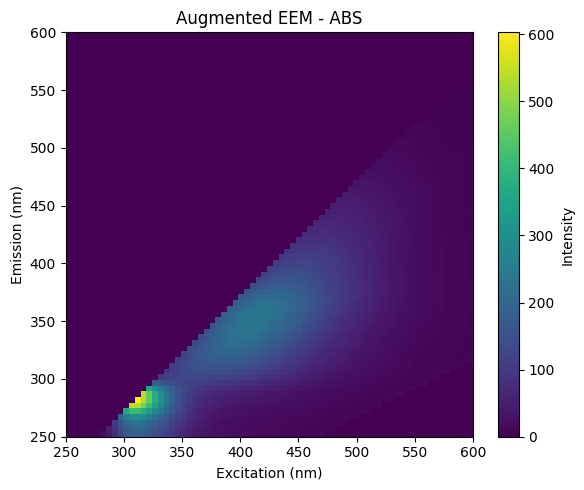

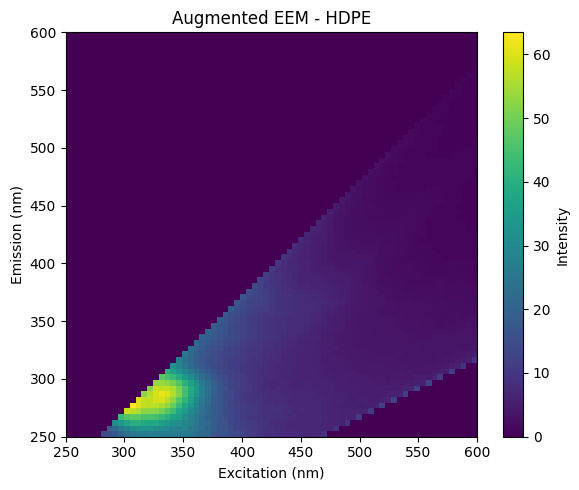

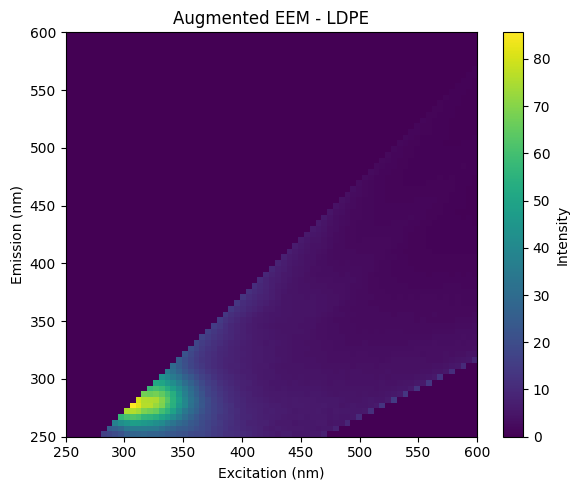

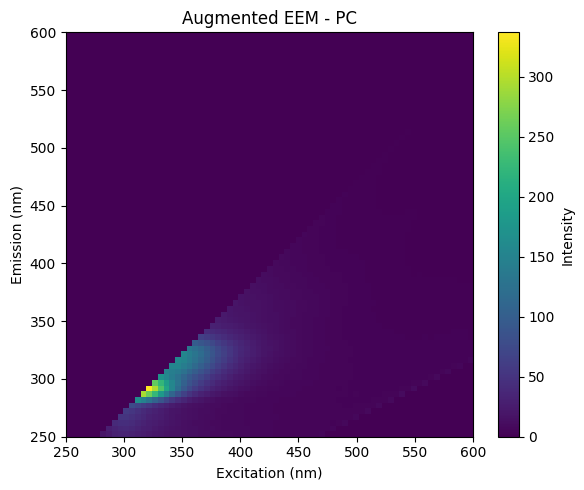

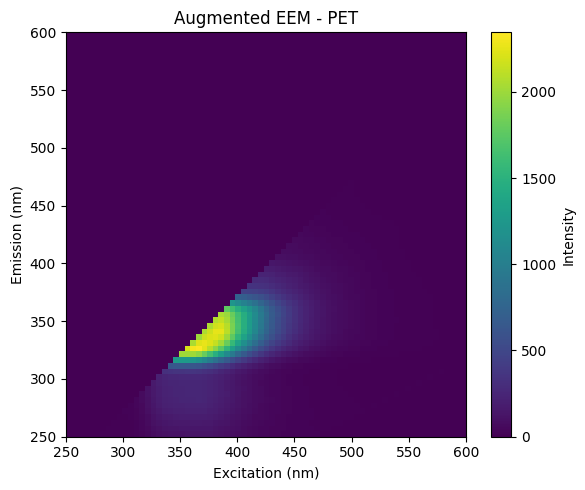

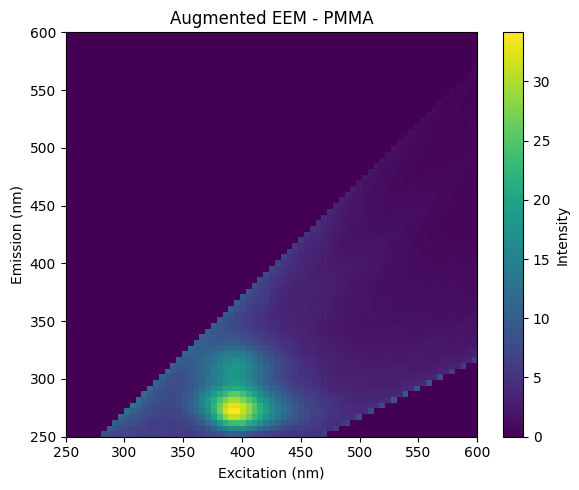

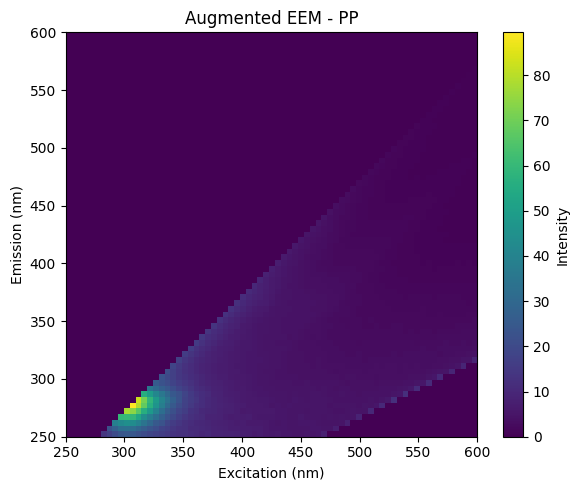

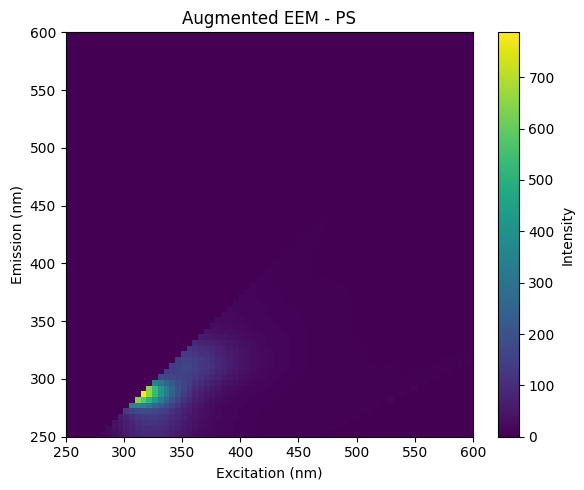

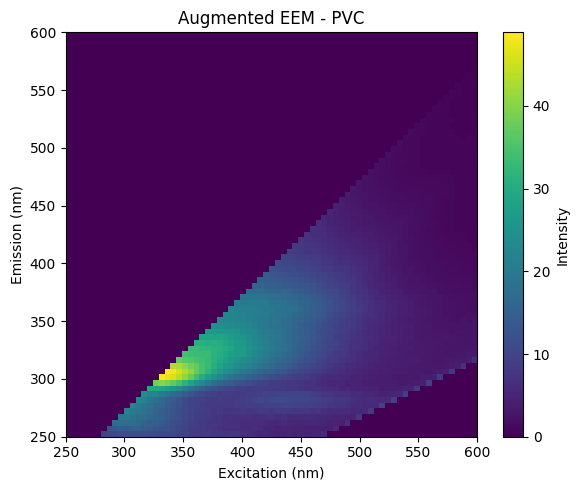

In [8]:
import matplotlib.pyplot as plt

def plot_augmented_eems_one_by_one(augmented_eems, ex_bands, em_bands, sample_names=None):
    """
    各MPから1つずつノイズ付きEEMを、個別にプロット（励起：横軸、放射：縦軸）。

    Parameters:
        augmented_eems: np.ndarray
            shape = (num_MP, n_variants, n_ex, n_em)
        ex_bands: np.ndarray
            励起波長リスト（横軸）
        em_bands: np.ndarray
            発光波長リスト（縦軸）
        sample_names: list or None
            MPごとの名前リスト（任意）
    """
    num_MP = augmented_eems.shape[0]

    for mp_idx in range(num_MP):
        eem = augmented_eems[mp_idx, 0]  # 各MPで最初のノイズバージョンを表示

        plt.figure(figsize=(6, 5))
        plt.imshow(eem, origin='lower',
                   extent=[ex_bands[0], ex_bands[-1], em_bands[0], em_bands[-1]],
                   aspect='auto', cmap='viridis')

        plt.xlabel('Excitation (nm)')
        plt.ylabel('Emission (nm)')
        title = sample_names[mp_idx] if sample_names else f'MP {mp_idx}'
        plt.title(f'Augmented EEM - {title}')
        plt.colorbar(label='Intensity')
        plt.tight_layout()
        plt.show()

plot_augmented_eems_one_by_one(augmented_eems, ex_bands, em_bands, sample_names=sample_name)
# plot_augmented_eems_one_by_one(combined_augmented_eems, ex_bands, em_bands, sample_names=sample_name)


## MPのEEMを合成

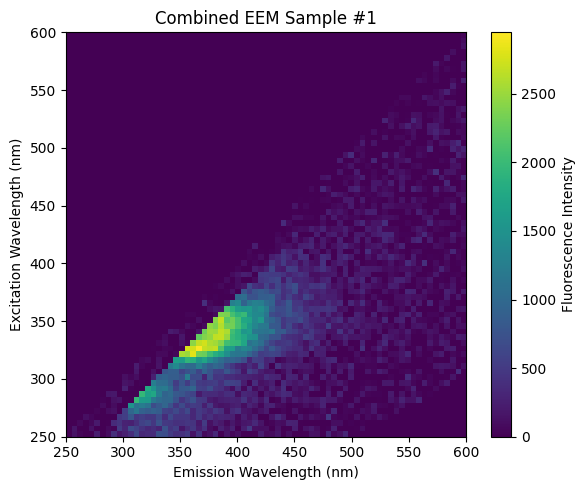

In [9]:
def generate_combined_eem_with_noise(
    eem_array, ex_bands, em_bands,
    n_variants=20, noise_level=0.05, seed=None
):
    """
    全MPのEEMを合成して、ノイズ付きのEEMを生成（散乱領域除去つき）

    Parameters:
        eem_array: np.ndarray
            shape = (num_MP, n_ex, n_em)
        ex_bands: np.ndarray
            励起波長リスト（shape = n_ex）
        em_bands: np.ndarray
            放射波長リスト（shape = n_em）
        n_variants: int
            生成するバリエーション数
        noise_level: float
            ノイズのスケール（合成EEMの最大値に対する割合）
        seed: int or None
            乱数シード

    Returns:
        combined_eems: np.ndarray
            shape = (n_variants, n_ex, n_em)
    """
    if seed is not None:
        np.random.seed(seed)

    # --- 合成EEM（すべてのMPの和）
    combined_base = np.sum(eem_array, axis=0)  # shape = (n_ex, n_em)

    # --- 散乱領域マスクを作成
    ex_grid, em_grid = np.meshgrid(ex_bands, em_bands, indexing='ij')
    valid_mask = (em_grid >= ex_grid) & (em_grid <= 2 * ex_grid)

    # --- ノイズ付きEEMの生成
    combined_eems = np.zeros((n_variants, *combined_base.shape))
    for i in range(n_variants):
        noise = np.random.normal(loc=0, scale=noise_level * np.max(combined_base), size=combined_base.shape)
        noisy_eem = np.clip(combined_base + noise, 0, None)
        noisy_eem[~valid_mask] = 0  # 散乱領域をゼロに
        combined_eems[i] = noisy_eem

    return combined_eems

combined_augmented_eems = generate_combined_eem_with_noise(
    eem_array,
    ex_bands=ex_bands,
    em_bands=em_bands,
    n_variants=50,
    noise_level=0.05,
    seed=123
)


# 1枚目を取得
eem_sample = combined_augmented_eems[0]

# プロット
plt.figure(figsize=(6, 5))
plt.imshow(
    eem_sample,
    aspect='auto',
    origin='lower',
    extent=[em_bands.min(), em_bands.max(), ex_bands.min(), ex_bands.max()],
    cmap='viridis'
)
plt.colorbar(label='Fluorescence Intensity')
plt.xlabel('Emission Wavelength (nm)')
plt.ylabel('Excitation Wavelength (nm)')
plt.title('Combined EEM Sample #1')
plt.tight_layout()
plt.show()


## PARAFAC，Core Consistency，Split half

In [10]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
from scipy.stats import pearsonr
from corcondia import corcondia_3d

tl.set_backend('numpy')

# --- PARAFAC結果をすべて保存する関数 ---
def compute_parafac_results(eem_tensor, max_components):
    results = []
    for r in range(1, max_components + 1):
        factors = parafac(eem_tensor, rank=r, init='random', tol=1e-6, n_iter_max=200)
        results.append(factors)
    return results

# --- Core Consistency Diagnostic (正式版 CORCONDIA)
def compute_core_consistency_corcondia(tensor, max_components=7):
    cc_list = []
    for r in range(1, max_components + 1):
        cc = corcondia_3d(tensor, k=r)
        cc_list.append(cc)
    return cc_list

# --- Split-Half 類似度の一括計算（各ランクで別々に分割＋分解）
def compute_split_half_similarities(tensor, max_components):
    sim_list = []
    for r in range(1, max_components + 1):
        all_idx = np.arange(tensor.shape[2])
        np.random.shuffle(all_idx)
        half1 = tensor[:, :, all_idx[:tensor.shape[2] // 2]]
        half2 = tensor[:, :, all_idx[tensor.shape[2] // 2:]]

        f1 = parafac(half1, rank=r, init='random', tol=1e-6, n_iter_max=200)
        f2 = parafac(half2, rank=r, init='random', tol=1e-6, n_iter_max=200)

        ex1, em1, _ = f1.factors
        ex2, em2, _ = f2.factors

        sim_total = 0
        for i in range(r):
            r_ex, _ = pearsonr(ex1[:, i], ex2[:, i])
            r_em, _ = pearsonr(em1[:, i], em2[:, i])
            sim_total += (r_ex + r_em) / 2
        sim_list.append(sim_total / r)
    return sim_list

# --- 各MPに対して Core Consistency（CORCONDIA）と Split-Half 類似度を計算 ---
cc_dict = {}
sh_dict = {}
factors_dict = {}

for idx, eem_tensor in enumerate(augmented_eems):
    sample = sample_name[idx]
    print(f"\n🔍【{sample}】の Core Consistency / Split-Half 計算中...")

    tensor = np.transpose(eem_tensor, (1, 2, 0))  # (exc, em, sample)
    factors_dict[sample] = compute_parafac_results(tensor, max_components=7)

    # 正式な Core Consistency 計算（CORCONDIA）
    cc_dict[sample] = compute_core_consistency_corcondia(tensor, max_components=7)

    # Split-Half 類似度
    sh_dict[sample] = compute_split_half_similarities(tensor, max_components=7)



🔍【ABS】の Core Consistency / Split-Half 計算中...

🔍【HDPE】の Core Consistency / Split-Half 計算中...

🔍【LDPE】の Core Consistency / Split-Half 計算中...

🔍【PC】の Core Consistency / Split-Half 計算中...

🔍【PET】の Core Consistency / Split-Half 計算中...

🔍【PMMA】の Core Consistency / Split-Half 計算中...

🔍【PP】の Core Consistency / Split-Half 計算中...

🔍【PS】の Core Consistency / Split-Half 計算中...

🔍【PVC】の Core Consistency / Split-Half 計算中...


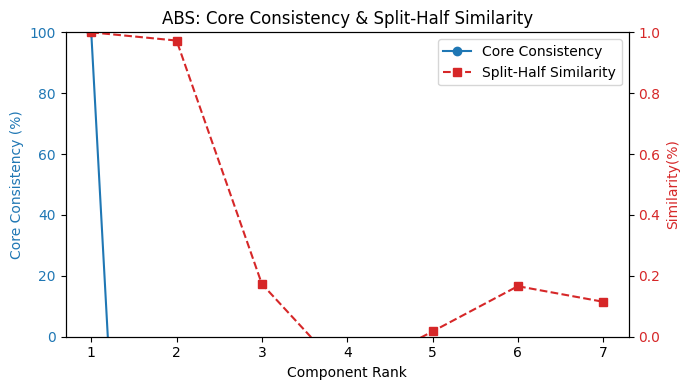

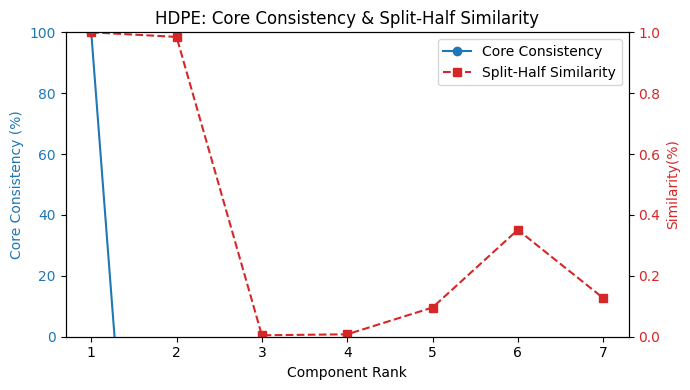

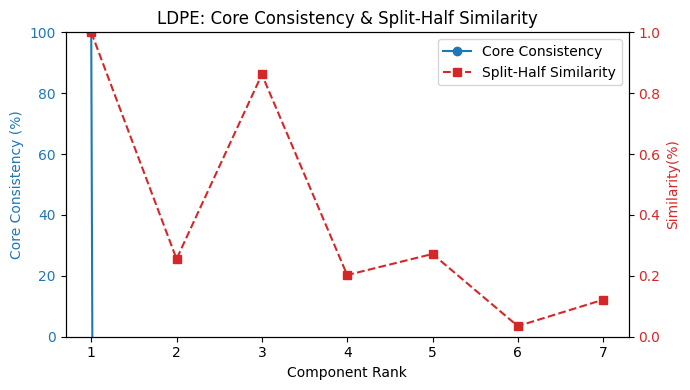

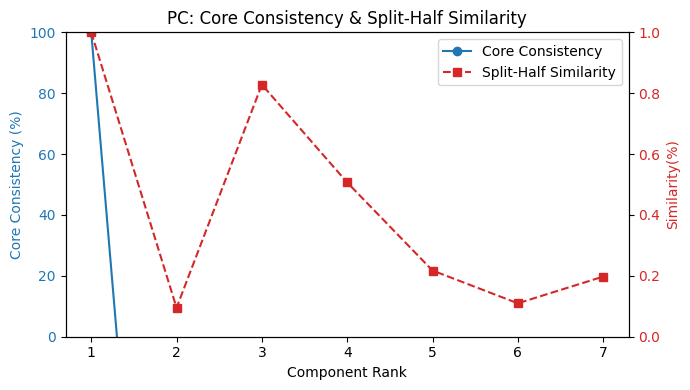

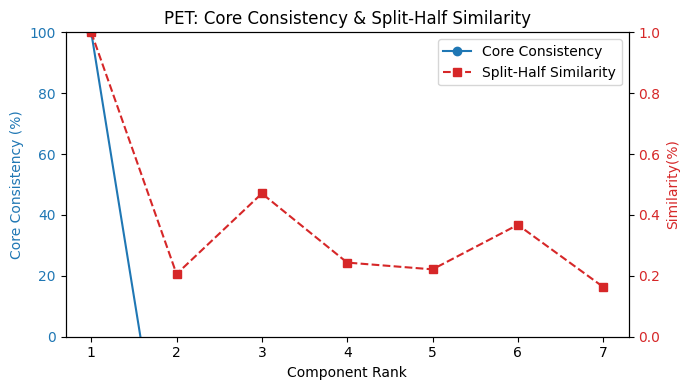

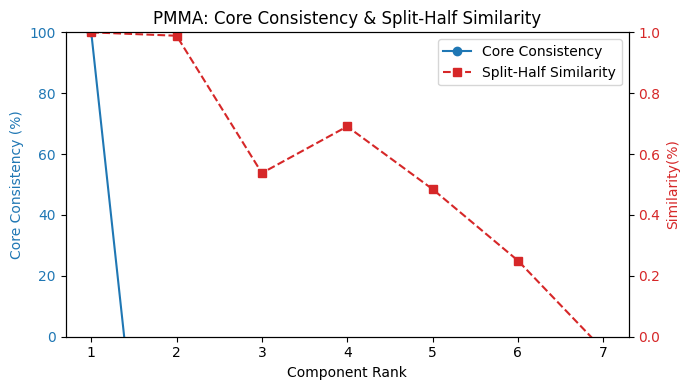

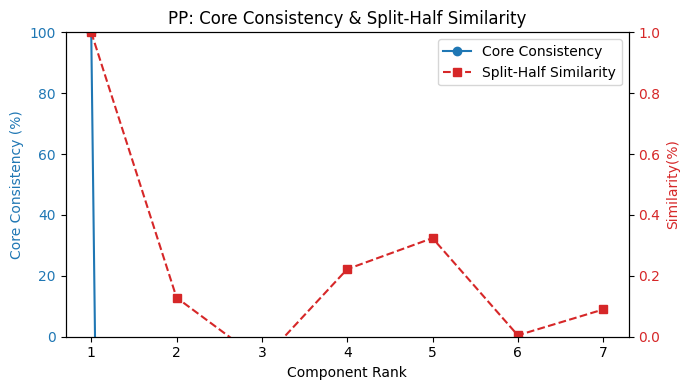

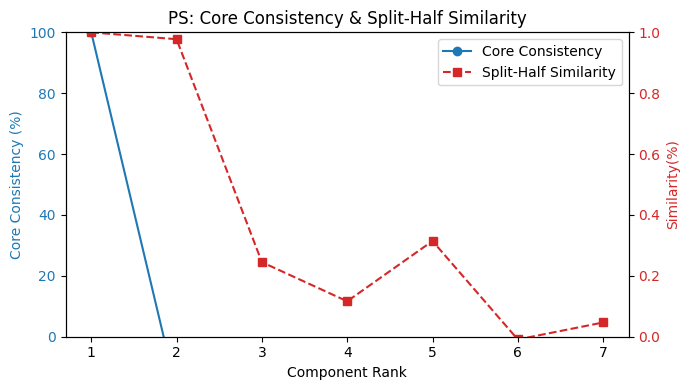

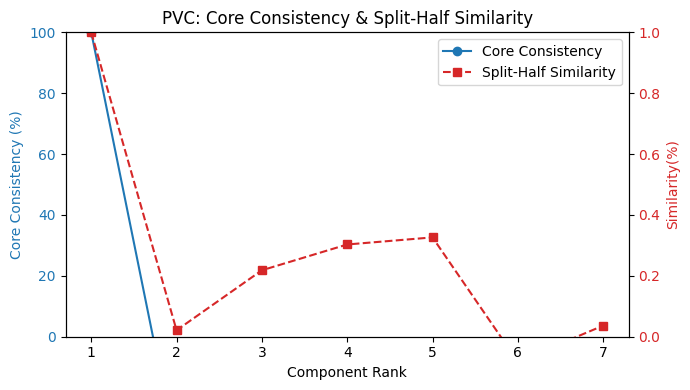

In [11]:
import matplotlib.pyplot as plt

def plot_core_consistency_and_similarity(cc_list, sh_list, sample_label="Sample", start_rank=1):
    """
    Core ConsistencyとSplit-Half類似度を同時にプロットする関数

    Parameters:
        cc_list: list of float（Core Consistency, 各成分数に対応）
        sh_list: list of float（Split-Half 類似度, 各成分数に対応）
        sample_label: str（プロットタイトル用）
        start_rank: int（通常は1, cc_list[0]がrank=1のとき）
    """
    ranks = list(range(start_rank, start_rank + len(cc_list)))

    fig, ax1 = plt.subplots(figsize=(7, 4))
    ax2 = ax1.twinx()

    ax1.plot(ranks, cc_list, 'o-', color='tab:blue', label='Core Consistency')
    ax2.plot(ranks, sh_list, 's--', color='tab:red', label='Split-Half Similarity')

    ax1.set_xlabel("Component Rank")
    ax1.set_ylabel("Core Consistency (%)", color='tab:blue')
    ax1.set_ylim(0, 100)
    ax2.set_ylabel("Similarity(%)", color='tab:red')
    ax2.set_ylim(0, 1.0)

    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    ax1.set_title(f"{sample_label}: Core Consistency & Split-Half Similarity")

    # 凡例の設定
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()

# for sample in sample_name:
#     plot_core_consistency_and_similarity(cc_list, sh_list, sample_label=sample)
for sample in sample_name:
    cc_list = cc_dict.get(sample)
    sh_list = sh_dict.get(sample)
    if cc_list is not None and sh_list is not None:
        plot_core_consistency_and_similarity(cc_list, sh_list, sample_label=sample)
    else:
        print(f"{sample} の解析結果が見つかりません。")


## コンポーネントの可視化

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_eem_with_bandpass_box(eem, ex_bands, em_bands,
                                excitation_loading, emission_loading,
                                rank, band_width=20, sample_label="MP"):
    """
    ノイズ付きEEM上に、指定コンポーネントのバンドパス波長範囲を紫の四角で重ねて表示

    Parameters:
        eem: 2D array (ex × em)
        ex_bands: 1D array
        em_bands: 1D array
        excitation_loading: 2D array (ex, rank)
        emission_loading: 2D array (em, rank)
        component_idx: int（何番目のコンポーネントか、0始まり）
        band_width: float（±何nmで範囲を取るか）
        sample_label: str
    """

    # EEMをプロット
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(eem, origin='lower',
                   extent=[em_bands[0], em_bands[-1],
                           ex_bands[0], ex_bands[-1]],
                   aspect='auto', cmap='viridis')
    
    for i in range(rank):
        # ピーク波長をローディングから抽出
        exc_idx = np.argmax(excitation_loading[:, i])
        em_idx = np.argmax(emission_loading[:, i])
        exc_peak = ex_bands[exc_idx]
        em_peak = em_bands[em_idx]

        # 四角の範囲（±band_width）
        exc_min = exc_peak - band_width
        exc_max = exc_peak + band_width
        em_min = em_peak - band_width
        em_max = em_peak + band_width

        # # ローディング
        # exc = excitation_loading[:, i]
        # em = emission_loading[:, i]

        # # ピーク位置（最大値）インデックス → 波長
        # exc_idx = np.argmax(exc)
        # em_idx = np.argmax(em)
        # exc_peak = ex_bands[exc_idx]
        # em_peak = em_bands[em_idx]

        # # 🎯 励起ローディングの標準偏差を使って band_width を決める
        # # 重み付き平均と分散（中心波長±幅）
        # exc_mean = np.sum(ex_bands * exc) / np.sum(exc)
        # exc_var = np.sum(((ex_bands - exc_mean) ** 2) * exc) / np.sum(exc)
        # band_width = np.sqrt(exc_var)   # 標準偏差

        # # 四角の範囲（±1σ程度）
        # exc_min = exc_peak - band_width
        # exc_max = exc_peak + band_width
        # em_min = em_peak - band_width
        # em_max = em_peak + band_width

        # 🔴 赤い横線で Excitation peak を示す  
        ax.hlines(y=exc_peak, xmin=em_bands[0], xmax=em_bands[-1], colors='red', linestyles='dashed', linewidth=1.5)

        # # ⬅ ラベルを左に表示（x=最小放射波長 - 少し左にオフセット）
        # ax.text(em_bands[0] - 10, exc_peak, f"Ex = {exc_peak} nm",
        #         color='red', fontsize=10, va='center', ha='right')

        print(f"Loading_{i+1} peak ex_band: {exc_peak}")
        print(f"Loading_{i+1} peak em_band: {em_peak}")
        
        # 紫の四角を重ねる
        rect = patches.Rectangle(
            (em_min, exc_min),  # 左下角 (x, y)
            em_max - em_min,    # 幅
            exc_max - exc_min,  # 高さ
            linewidth=2,
            edgecolor='white',
            facecolor='none'
        )
        ax.add_patch(rect)
        ax.set_title(f"{sample_label} - EEM with Bandpass Box (Component {rank})")
        ax.set_xlabel("Emission Wavelength (nm)")
        ax.set_ylabel("Excitation Wavelength (nm)")
        plt.tight_layout()
    plt.colorbar(im, ax=ax, label="Fluorescence Intensity")
    plt.show()


In [13]:
import matplotlib.pyplot as plt

def plot_selected_loadings(factors, rank, ex_bands, em_bands, sample_label="Sample"):
    """
    指定したrankのPARAFAC結果を使って、励起と発光のローディングをプロット

    Parameters:
        results: list of parafac results（compute_parafac_results()の出力）
        rank: int（表示したいコンポーネント数）
        ex_bands: 1D array（励起波長）
        em_bands: 1D array（発光波長）
        sample_label: str（MPの名前など）
    """
    factors_rank = factors[rank - 1]  # インデックス注意：rank=1 → results[0]
    excitation_loading, emission_loading, _ = factors_rank.factors

    # --- 励起ローディング ---
    plt.figure(figsize=(6, 3))
    for i in range(rank):
        plt.plot(ex_bands, excitation_loading[:, i], label=f"Component {i+1}")
    plt.title(f"{sample_label} - Excitation Loading (Rank {rank})")
    plt.xlabel("Excitation Wavelength (nm)")
    plt.ylabel("Loading Strength")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- 発光ローディング ---
    plt.figure(figsize=(6, 3))
    for i in range(rank):
        plt.plot(em_bands, emission_loading[:, i], label=f"Component {i+1}")
    plt.title(f"{sample_label} - Emission Loading (Rank {rank})")
    plt.xlabel("Emission Wavelength (nm)")
    plt.ylabel("Loading Strength")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ローディングの帯域図示化
    plot_eem_with_bandpass_box(eem, ex_bands, em_bands,
                            excitation_loading, emission_loading,
                            rank, band_width=20, sample_label=sample
                            )


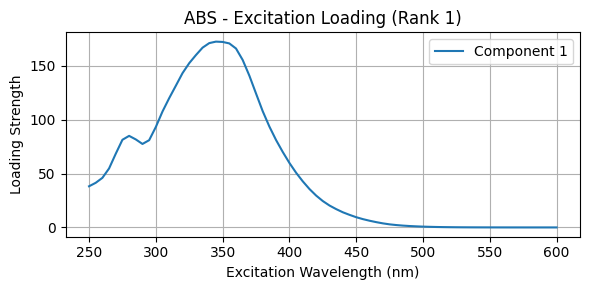

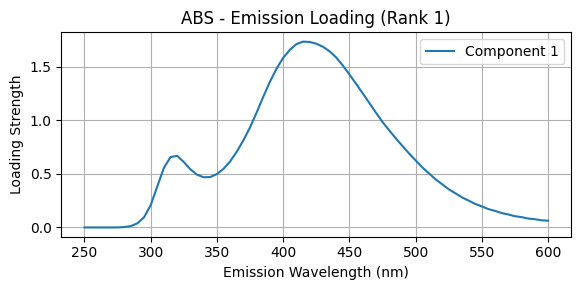

Loading_1 peak ex_band: 345.0
Loading_1 peak em_band: 415.0


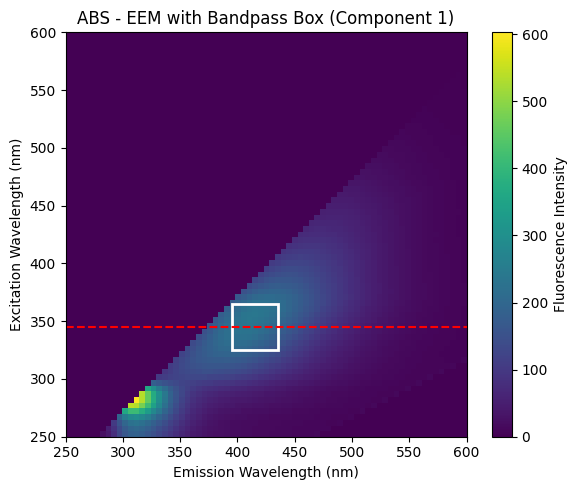

In [14]:
sample = "ABS"
rank = 1
factors = factors_dict.get(sample)

mp_idx = sample_name.index(sample)  # "PET" に対応するインデックス（例：0）
eem = augmented_eems[mp_idx, 0]  # PETの最初のノイズ付きEEM（shape: 81x81）


if factors is not None:
    plot_selected_loadings(
        factors, 
        rank,
        ex_bands,
        em_bands,
        sample_label=sample
    )
else:
    print(f"{sample} の解析結果が見つかりません。")



---